<a href="https://colab.research.google.com/github/nikitha-ramchander/Credit-Card-Client/blob/main/CreditCardProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import Libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load Data
credit_card = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Credit Card Clients Project/UCI_Credit_Card.csv')
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# Summary of the DataFrame
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
# Check out datatypes
credit_card.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [10]:
# Are there any missing values?
credit_card.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [11]:
# Are there any duplicated rows 
credit_card.duplicated().any()

False

In [12]:
credit_card['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [13]:
credit_card['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [14]:
credit_card['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [15]:
# In-depth detail of the data
credit_card.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
# Rename target column
credit_card.rename(columns={"default.payment.next.month": "Default_Payment"}, inplace=True)

In [17]:
# Set ID to index 
credit_card.set_index('ID', inplace = True)

In [18]:
# In the marriage column there are 4 assigned categories
# Marital status (1=married, 2=single, 3=others, 0 = unknown)
# # I decided to group 0 under 3 because an unknown category is irrelevant 
credit_card['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [19]:
credit_card['MARRIAGE']=np.where(credit_card['MARRIAGE'] == 0, 3, credit_card['MARRIAGE'])
credit_card['MARRIAGE'].unique()

array([1, 2, 3])

In [20]:
# In the education column there are 7 assigned categories 
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# I decided to group 4, 5, and 6 under 4 because an unknown category is irrelevant 
credit_card['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [21]:
credit_card['EDUCATION']=np.where(credit_card['EDUCATION'] == 5, 4, credit_card['EDUCATION'])
credit_card['EDUCATION']=np.where(credit_card['EDUCATION'] == 6, 4, credit_card['EDUCATION'])
credit_card['EDUCATION']=np.where(credit_card['EDUCATION'] == 0, 4, credit_card['EDUCATION'])
credit_card['EDUCATION'].unique()

array([2, 1, 3, 4])

In [22]:
# Checking to see if everything is accurate
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LIMIT_BAL        30000 non-null  float64
 1   SEX              30000 non-null  int64  
 2   EDUCATION        30000 non-null  int64  
 3   MARRIAGE         30000 non-null  int64  
 4   AGE              30000 non-null  int64  
 5   PAY_0            30000 non-null  int64  
 6   PAY_2            30000 non-null  int64  
 7   PAY_3            30000 non-null  int64  
 8   PAY_4            30000 non-null  int64  
 9   PAY_5            30000 non-null  int64  
 10  PAY_6            30000 non-null  int64  
 11  BILL_AMT1        30000 non-null  float64
 12  BILL_AMT2        30000 non-null  float64
 13  BILL_AMT3        30000 non-null  float64
 14  BILL_AMT4        30000 non-null  float64
 15  BILL_AMT5        30000 non-null  float64
 16  BILL_AMT6        30000 non-null  float64
 17  PAY_AMT1    

#Data Visualization

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


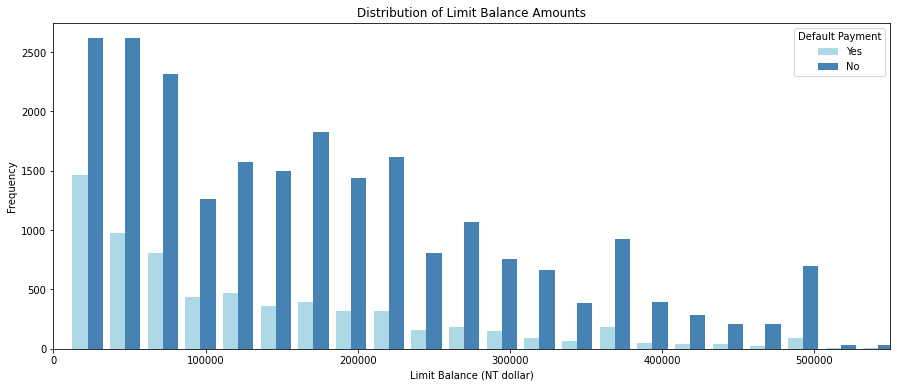

In [23]:
# Show distribution for the amount of limit balances 
yes = list(credit_card[credit_card['Default_Payment'] == 1]['LIMIT_BAL']);
no = list(credit_card[credit_card['Default_Payment'] == 0]['LIMIT_BAL']);

plt.figure(figsize=(15,6))
plt.hist([yes, no], bins = 40, color=['lightblue', 'steelblue']);
plt.xlim([0,550000]);
plt.legend(['Yes', 'No'], title = 'Default Payment', loc='upper right');
plt.xlabel('Limit Balance (NT dollar)');
plt.ylabel('Frequency');
plt.title('Distribution of Limit Balance Amounts');

Interpretation: 

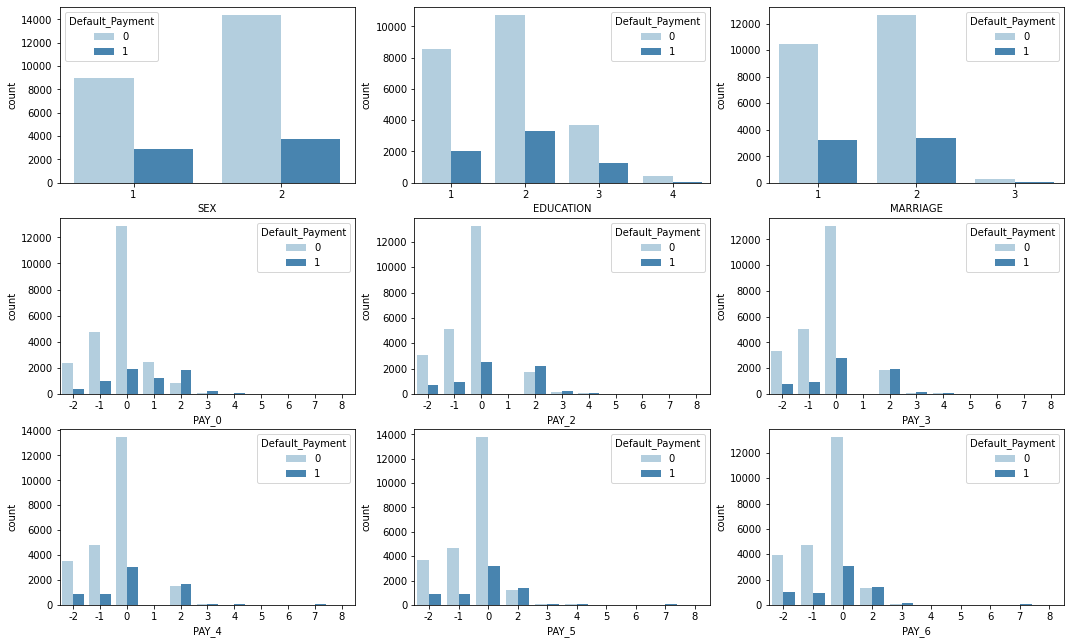

In [25]:
# Show the counts of observations in each categorical bin using bars.
cat_vars = credit_card[['SEX', 'EDUCATION', 'MARRIAGE', 
                                     'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
                                     'PAY_5', 'PAY_6', 'Default_Payment']]

f, ax = plt.subplots(3, 3, figsize=(18, 11))
ax1 = sns.countplot(x="SEX", hue="Default_Payment", data=cat_vars, palette="Blues", ax=ax[0,0])

ax2 = sns.countplot(x="EDUCATION", hue="Default_Payment", data=cat_vars, palette="Blues",ax=ax[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default_Payment", data=cat_vars, palette="Blues",ax=ax[0,2])
ax4 = sns.countplot(x="PAY_0", hue="Default_Payment", data=cat_vars, palette="Blues", ax=ax[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default_Payment", data=cat_vars, palette="Blues", ax=ax[1,1])
ax5.legend(title = 'Default_Payment', loc = 'upper right')
ax6 = sns.countplot(x="PAY_3", hue="Default_Payment", data=cat_vars, palette="Blues", ax=ax[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default_Payment", data=cat_vars, palette="Blues", ax=ax[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default_Payment", data=cat_vars, palette="Blues", ax=ax[2,1])
ax8.legend(title = 'Default_Payment', loc = 'upper right')
ax9 = sns.countplot(x="PAY_6", hue="Default_Payment", data=cat_vars, palette="Blues", ax=ax[2,2]);
ax9.legend(title = 'Default_Payment', loc = 'upper right')

Interpretation: 

In [ ]:
# Show a boxplot of all the Amount of Previous Payment  and their respective sales.
prev_pay = credit_card[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                        'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

#scatter plot for pay 1 and bill 1

plt.figure(figsize=(20,10));
sns.boxplot(x='prev_pay', y='Default_Payment', data=credit_card);
plt.xticks(rotation = 45);
plt.xlabel('', fontsize = 16);
plt.ylabel('', fontsize = 16);
plt.title('', fontsize = 16);

In [ ]:
# Plot rectangular data as a color-encoded matrix.
plt.figure(figsize=(20,10));
sns.heatmap(credit_card.corr(), annot= True, cmap= 'Blues');
plt.title('Correlation Matrix');

Interpretation: 